In [1]:
import math
import json

import keras
import librosa
import os

import numpy
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
def preprocess(dataset_path, num_mfcc=40, n_fft=2048, hop_length=512, num_segment=10):
    data = {"labels":[], "mfcc":[]}
    sample_rate = 22050
    sample_per_segment = int(sample_rate*30/num_segment)

    for label_idx, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath == dataset_path:
            continue
        for f in sorted(filenames):
            if not f.endswith('.wav'):
                continue
            file_path = str(str(dirpath).split('\\')[-1]) + '/' + str(f)
            print("Track Name", file_path)

            try:
                y, sr = librosa.load(dirpath + "\\" + f, sr=sample_rate)
            except:
                print("Exception")
                continue
            for n in range(num_segment):
                # if (file_path == 'jazz/jazz.00055.wav'):
                #     print(n)
                mfcc = librosa.feature.mfcc(y=y[sample_per_segment*n: sample_per_segment*(n + 1)],
                                            sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                            hop_length=hop_length)
                mfcc = mfcc.T
                if len(mfcc) == math.ceil(sample_per_segment / hop_length):
                    data["mfcc"].append(mfcc.tolist())
                    data["labels"].append(label_idx-1)
    return data


def prepare_datasets(test_size, validation_size):

    mfcc_data = preprocess(r"C:\Users\dpetr\Desktop\sxoli\music genre classification\MFCC-CNN\Data\genres_original")
    x = np.array(mfcc_data["mfcc"])
#     print(x.shape)
    y = np.array(mfcc_data["labels"])
#     print(y.shape)
#     print(numpy.unique(y))

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=validation_size)

    return x_train, x_test, x_validation, y_train, y_test, y_validation


x_train, x_test, x_validation, y_train, y_test, y_validation = prepare_datasets(test_size=0.2, validation_size=0.25)

print(x_train.shape, x_validation.shape, x_test.shape)


Track Name blues/blues.00000.wav
Track Name blues/blues.00001.wav
Track Name blues/blues.00002.wav
Track Name blues/blues.00003.wav
Track Name blues/blues.00004.wav
Track Name blues/blues.00005.wav
Track Name blues/blues.00006.wav
Track Name blues/blues.00007.wav
Track Name blues/blues.00008.wav
Track Name blues/blues.00009.wav
Track Name blues/blues.00010.wav
Track Name blues/blues.00011.wav
Track Name blues/blues.00012.wav
Track Name blues/blues.00013.wav
Track Name blues/blues.00014.wav
Track Name blues/blues.00015.wav
Track Name blues/blues.00016.wav
Track Name blues/blues.00017.wav
Track Name blues/blues.00018.wav
Track Name blues/blues.00019.wav
Track Name blues/blues.00020.wav
Track Name blues/blues.00021.wav
Track Name blues/blues.00022.wav
Track Name blues/blues.00023.wav
Track Name blues/blues.00024.wav
Track Name blues/blues.00025.wav
Track Name blues/blues.00026.wav
Track Name blues/blues.00027.wav
Track Name blues/blues.00028.wav
Track Name blues/blues.00029.wav
Track Name

C:\Users\dpetr\miniconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Exception
Track Name jazz/jazz.00055.wav
Track Name jazz/jazz.00056.wav
Track Name jazz/jazz.00057.wav
Track Name jazz/jazz.00058.wav
Track Name jazz/jazz.00059.wav
Track Name jazz/jazz.00060.wav
Track Name jazz/jazz.00061.wav
Track Name jazz/jazz.00062.wav
Track Name jazz/jazz.00063.wav
Track Name jazz/jazz.00064.wav
Track Name jazz/jazz.00065.wav
Track Name jazz/jazz.00066.wav
Track Name jazz/jazz.00067.wav
Track Name jazz/jazz.00068.wav
Track Name jazz/jazz.00069.wav
Track Name jazz/jazz.00070.wav
Track Name jazz/jazz.00071.wav
Track Name jazz/jazz.00072.wav
Track Name jazz/jazz.00073.wav
Track Name jazz/jazz.00074.wav
Track Name jazz/jazz.00075.wav
Track Name jazz/jazz.00076.wav
Track Name jazz/jazz.00077.wav
Track Name jazz/jazz.00078.wav
Track Name jazz/jazz.00079.wav
Track Name jazz/jazz.00080.wav
Track Name jazz/jazz.00081.wav
Track Name jazz/jazz.00082.wav
Track Name jazz/jazz.00083.wav
Track Name jazz/jazz.00084.wav
Track Name jazz/jazz.00085.wav
Track Name jazz/jazz.00086.wa

In [2]:
# def manipulate(data, noise_factor):
#     noise = np.random.randn(len(data))
#     augmented_data = data + noise_factor * noise
#     # Cast back to same data type
#     augmented_data = augmented_data.astype(type(data[0]))
#     return augmented_data

# manipulate(x_train, 0.5)
# manipulate(y_train, 0.5)

In [36]:
def build_model(input_shape):
    
    #create model
    model = keras.Sequential()
    
    # 2 LSTM layers
    model.add(keras.layers.LSTM(256, input_shape=input_shape, return_sequences=True))

    model.add(keras.layers.LSTM(256))

    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.5))

    
    
    #output layer
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

In [37]:
input_shape = (x_train.shape[1], x_train.shape[2])
model = build_model(input_shape)
optimizer = keras.optimizers.Adam(learning_rate=0.0008) #0.0008 best #0.0003 good #0.0005 best #0.0007 good
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
for layer in range(len(model.layers)):
    print(model.layers[layer].trainable_weights)
    print()

[<tf.Variable 'lstm_21/lstm_cell_21/kernel:0' shape=(40, 1024) dtype=float32, numpy=
array([[ 0.03203195,  0.00405806,  0.0140302 , ...,  0.04430556,
         0.01198892,  0.06460305],
       [ 0.03035256,  0.02216037, -0.04094204, ..., -0.00485821,
        -0.0254878 , -0.06313335],
       [ 0.07440005,  0.06553973, -0.05693694, ...,  0.06280163,
        -0.03806096, -0.01382878],
       ...,
       [-0.01518955,  0.03248537,  0.02315148, ...,  0.02993993,
        -0.02871499,  0.05916421],
       [-0.06382911, -0.05029815, -0.04919475, ..., -0.01574189,
        -0.029211  , -0.01166824],
       [ 0.0088022 , -0.07163384,  0.07360256, ...,  0.07149626,
         0.01451856, -0.03825551]], dtype=float32)>, <tf.Variable 'lstm_21/lstm_cell_21/recurrent_kernel:0' shape=(256, 1024) dtype=float32, numpy=
array([[-0.04571211,  0.00904141, -0.00634267, ...,  0.00832181,
        -0.0020839 , -0.02049253],
       [ 0.04673278, -0.03375721, -0.01964344, ..., -0.00783636,
         0.0163119 , -0.0

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 130, 256)          304128    
                                                                 
 lstm_22 (LSTM)              (None, 256)               525312    
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 10)                1290      
                                                                 
Total params: 863,626
Trainable params: 863,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
188/188 [===========================

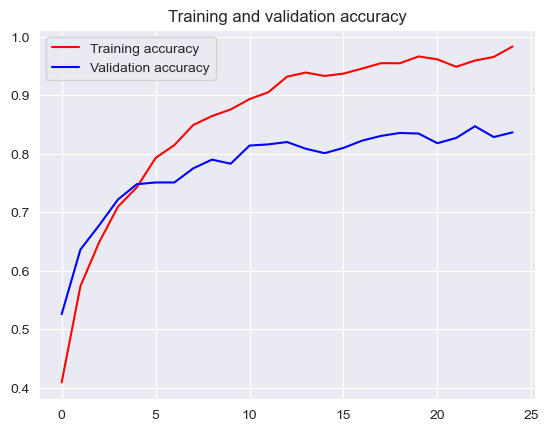

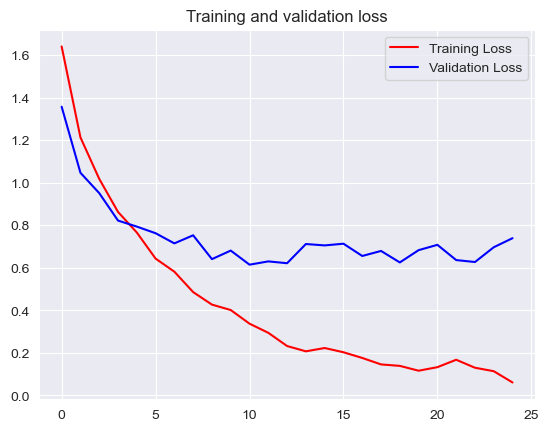

Accuracy on test set is:0.8418418169021606


In [38]:


model.summary()

history = model.fit(x_train, y_train,
          validation_data=(x_validation, y_validation),
          epochs=25,
          batch_size=32
          )

# model.save('saved_models/LSTM')

test_error, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy' + str())
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

print("Accuracy on test set is:{}".format(test_accuracy))



In [39]:
model.save('saved_models/LSTM')

INFO:tensorflow:Assets written to: saved_models/LSTM\assets


INFO:tensorflow:Assets written to: saved_models/LSTM\assets


In [9]:
 def predict(model,x, y):

    x = x[np.newaxis, ...]
    prediction = model.predict(x)
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Expected index: {y}, Predicted index:{predicted_index}")

    
x = x_test[55]
y = y_test[55]

lstm_model = tf.keras.models.load_model('saved_models/LSTM')
predict(model, x, y)
predict(lstm_model, x, y)

1/1 [==============================] - 0s 29ms/step
Expected index: 1, Predicted index:[1]
1/1 [==============================] - 1s 607ms/step
Expected index: 1, Predicted index:[1]


In [153]:
tf . print(tf. __version__)

2.10.0
